In [1]:
# %matplotlib inline
import scanpy as sc
import anndata
import os
from scipy import sparse
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from DEAPLOG import get_DEG_uniq, get_DEG_multi, get_genes_location_pseudotime
# sc.settings.verbosity = 3
# sc.logging.print_version_and_date()

In [2]:
cells_adata_path_A1 = (
    "../Data/skin_TXK6Z4X_A1_processed/tmap/weighted_by_area_celltypist_cells_adata.h5"
)

cells_adata_path_D1 = (
    "../Data/skin_TXK6Z4X_D1_processed/tmap/weighted_by_area_celltypist_cells_adata.h5"
)

In [3]:
adata_A1 = sc.read_h5ad(cells_adata_path_A1)

In [4]:
adata_A1

AnnData object with n_obs × n_vars = 101835 × 1084
    obs: 'cell_type', 'patch_id'
    obsm: 'spatial', 'stats'

In [5]:
cell_list = [
    "ID_61822",
    "ID_61849",
    "ID_61875",
    "ID_61909",
    "ID_61964",
    "ID_62001",
    "ID_62019",
    "ID_62021",
    "ID_62024",
    "ID_62056",
    "ID_62057",
    "ID_62062",
    "ID_62114",
    "ID_62161",
    "ID_62198",
    "ID_62211",
    "ID_62231",
    "ID_62251",
    "ID_62260",
    "ID_62277",
    "ID_62303",
    "ID_62355",
    "ID_62468",
    "ID_62512",
    "ID_62523",
    "ID_62533",
    "ID_62545",
    "ID_62621",
    "ID_62725",
    "ID_62745",
    "ID_62805",
    "ID_62845",
    "ID_62847",
    "ID_62849",
    "ID_62853",
    "ID_62888",
    "ID_62891",
    "ID_62904",
    "ID_62926",
    "ID_62930",
    "ID_62972",
    "ID_63002",
    "ID_63019",
    "ID_63023",
    "ID_63035",
    "ID_63044",
    "ID_63074",
    "ID_63099",
    "ID_63125",
    "ID_63132",
    "ID_63144",
    "ID_63202",
    "ID_63206",
    "ID_63230",
    "ID_63283",
    "ID_63287",
    "ID_63316",
    "ID_63319",
    "ID_63335",
    "ID_63371",
    "ID_63478",
    "ID_63539",
    "ID_63546",
    "ID_63571",
    "ID_63627",
    "ID_63650",
    "ID_63717",
    "ID_63745",
    "ID_63766",
    "ID_63775",
    "ID_63802",
    "ID_63843",
    "ID_63867",
    "ID_63913",
    "ID_63922",
    "ID_63940",
    "ID_63996",
    "ID_64114",
    "ID_64147",
    "ID_64186",
    "ID_64272",
    "ID_64285",
    "ID_64374",
    "ID_64401",
    "ID_64477",
    "ID_64507",
    "ID_64540",
    "ID_64769",
    "ID_64893",
    "ID_64910",
    "ID_64994",
    "ID_65226",
    "ID_65331",
    "ID_65581",
    "ID_65601",
    "ID_65607",
    "ID_65705",
    "ID_65730",
    "ID_65737",
    "ID_65838",
    "ID_65864",
    "ID_66014",
    "ID_66198",
    "ID_66302",
    "ID_66368",
    "ID_66556",
    "ID_66684",
    "ID_66705",
    "ID_66744",
    "ID_66765",
    "ID_66774",
    "ID_66879",
    "ID_66889",
    "ID_67148",
    "ID_67303",
    "ID_67554",
    "ID_67605",
    "ID_67772",
    "ID_67787",
    "ID_67830",
    "ID_67832",
    "ID_67929",
    "ID_67969",
    "ID_68043",
    "ID_68205",
    "ID_68224",
    "ID_68475",
    "ID_68505",
    "ID_68530",
    "ID_68595",
    "ID_68633",
    "ID_68651",
    "ID_68759",
    "ID_68819",
    "ID_68895",
    "ID_68897",
    "ID_68992",
    "ID_69055",
    "ID_69119",
    "ID_69176",
    "ID_69181",
    "ID_69183",
    "ID_69213",
    "ID_69224",
    "ID_69229",
    "ID_69444",
    "ID_69602",
    "ID_69862",
    "ID_69971",
    "ID_70130",
    "ID_70165",
    "ID_70323",
    "ID_70381",
    "ID_70399",
    "ID_70501",
    "ID_70537",
    "ID_70539",
    "ID_70543",
    "ID_70547",
    "ID_70554",
    "ID_70556",
    "ID_70573",
    "ID_70574",
    "ID_70597",
    "ID_70600",
    "ID_70602",
    "ID_70606",
    "ID_70612",
    "ID_70613",
    "ID_70615",
    "ID_70622",
    "ID_70633",
    "ID_70638",
    "ID_70639",
    "ID_70644",
    "ID_70645",
    "ID_70646",
    "ID_70650",
    "ID_70656",
    "ID_70662",
    "ID_70663",
    "ID_70665",
    "ID_70669",
    "ID_70672",
    "ID_70676",
    "ID_70677",
    "ID_70681",
    "ID_70689",
    "ID_70692",
    "ID_70699",
    "ID_70700",
    "ID_70704",
    "ID_70712",
    "ID_70720",
    "ID_70728",
    "ID_70735",
    "ID_70740",
    "ID_70741",
    "ID_70759",
    "ID_70761",
    "ID_70765",
    "ID_70767",
    "ID_70773",
    "ID_70784",
    "ID_70790",
    "ID_70795",
    "ID_70797",
    "ID_70799",
    "ID_70811",
    "ID_70822",
    "ID_70826",
    "ID_70832",
    "ID_70837",
    "ID_70841",
    "ID_70847",
    "ID_70854",
    "ID_70857",
    "ID_70865",
    "ID_70878",
    "ID_70880",
    "ID_70890",
    "ID_70892",
    "ID_70895",
    "ID_70900",
    "ID_70904",
    "ID_70907",
    "ID_70931",
    "ID_70934",
    "ID_70938",
    "ID_70939",
    "ID_70953",
    "ID_70962",
    "ID_70965",
    "ID_70982",
    "ID_70984",
    "ID_70988",
    "ID_70992",
    "ID_70996",
    "ID_71004",
    "ID_71019",
    "ID_71031",
    "ID_71033",
    "ID_71035",
    "ID_71040",
    "ID_71044",
    "ID_71047",
    "ID_71048",
    "ID_71062",
    "ID_71064",
    "ID_71068",
    "ID_71080",
    "ID_71088",
    "ID_71098",
    "ID_71101",
    "ID_71102",
    "ID_71104",
    "ID_71107",
    "ID_71117",
    "ID_71120",
    "ID_71123",
    "ID_71125",
    "ID_71128",
    "ID_71133",
    "ID_71138",
    "ID_71139",
    "ID_71142",
    "ID_71152",
    "ID_71158",
    "ID_71163",
    "ID_71174",
    "ID_71180",
    "ID_71186",
    "ID_71194",
    "ID_71198",
    "ID_71200",
    "ID_71202",
    "ID_71206",
    "ID_71209",
    "ID_71225",
    "ID_71250",
    "ID_71265",
    "ID_71271",
    "ID_71275",
    "ID_71280",
    "ID_71286",
    "ID_71302",
    "ID_71311",
    "ID_71318",
    "ID_71330",
    "ID_71331",
    "ID_71332",
    "ID_71346",
    "ID_71353",
    "ID_71364",
    "ID_71366",
    "ID_71376",
    "ID_71381",
    "ID_71383",
    "ID_71385",
    "ID_71387",
    "ID_71388",
    "ID_71391",
    "ID_71395",
    "ID_71407",
    "ID_71412",
    "ID_71420",
    "ID_71428",
    "ID_71431",
    "ID_71434",
    "ID_71439",
    "ID_71458",
    "ID_71460",
    "ID_71486",
    "ID_71491",
    "ID_71495",
    "ID_71496",
    "ID_71516",
    "ID_71518",
    "ID_71522",
    "ID_71523",
    "ID_71525",
    "ID_71533",
    "ID_71542",
    "ID_71550",
    "ID_71554",
    "ID_71556",
    "ID_71560",
    "ID_71561",
    "ID_71562",
    "ID_71574",
    "ID_71582",
    "ID_71593",
    "ID_71596",
    "ID_71598",
    "ID_71602",
    "ID_71605",
    "ID_71610",
    "ID_71615",
    "ID_71621",
    "ID_71622",
    "ID_71639",
    "ID_71644",
    "ID_71656",
    "ID_71668",
    "ID_71673",
    "ID_71676",
    "ID_71679",
    "ID_71680",
    "ID_71701",
    "ID_71702",
    "ID_71704",
    "ID_71707",
    "ID_71713",
    "ID_71724",
    "ID_71737",
    "ID_71742",
    "ID_71756",
    "ID_71768",
    "ID_71769",
    "ID_71774",
    "ID_71786",
    "ID_71795",
    "ID_71824",
    "ID_71835",
    "ID_71846",
    "ID_71847",
    "ID_71853",
    "ID_71855",
    "ID_71862",
    "ID_71867",
    "ID_71884",
    "ID_71886",
    "ID_71925",
    "ID_71928",
    "ID_71930",
    "ID_71941",
    "ID_71970",
    "ID_71978",
    "ID_71983",
    "ID_71984",
    "ID_71991",
    "ID_72004",
    "ID_72007",
    "ID_72013",
    "ID_72022",
    "ID_72029",
    "ID_72036",
    "ID_72040",
    "ID_72042",
    "ID_72050",
    "ID_72061",
    "ID_72067",
    "ID_72071",
    "ID_72074",
    "ID_72079",
    "ID_72083",
    "ID_72087",
    "ID_72095",
    "ID_72105",
    "ID_72112",
    "ID_72114",
    "ID_72129",
    "ID_72136",
    "ID_72140",
    "ID_72142",
    "ID_72155",
    "ID_72156",
    "ID_72158",
    "ID_72161",
    "ID_72169",
    "ID_72177",
    "ID_72184",
    "ID_72209",
    "ID_72221",
    "ID_72228",
    "ID_72229",
    "ID_72231",
    "ID_72234",
    "ID_72237",
    "ID_72249",
    "ID_72256",
    "ID_72257",
    "ID_72265",
    "ID_72272",
    "ID_72314",
    "ID_72333",
    "ID_72340",
    "ID_72349",
    "ID_72357",
    "ID_72363",
    "ID_72367",
    "ID_72381",
    "ID_72391",
    "ID_72425",
    "ID_72427",
    "ID_72432",
    "ID_72438",
    "ID_72455",
    "ID_72460",
    "ID_72466",
    "ID_72467",
    "ID_72470",
    "ID_72476",
    "ID_72497",
    "ID_72501",
    "ID_72509",
    "ID_72511",
    "ID_72517",
    "ID_72519",
    "ID_72539",
    "ID_72540",
    "ID_72542",
    "ID_72551",
    "ID_72555",
    "ID_72569",
    "ID_72579",
    "ID_72583",
    "ID_72591",
    "ID_72592",
    "ID_72606",
    "ID_72621",
    "ID_72622",
    "ID_72631",
    "ID_72649",
    "ID_72656",
    "ID_72660",
    "ID_72671",
    "ID_72691",
    "ID_72701",
    "ID_72715",
    "ID_72718",
    "ID_72727",
    "ID_72735",
    "ID_72748",
    "ID_72757",
    "ID_72762",
    "ID_72763",
    "ID_72792",
    "ID_72802",
    "ID_72803",
    "ID_72805",
    "ID_72810",
    "ID_72857",
    "ID_72884",
    "ID_72888",
    "ID_72908",
    "ID_72909",
    "ID_72910",
    "ID_72922",
    "ID_72923",
    "ID_72937",
    "ID_72938",
    "ID_72955",
    "ID_72971",
    "ID_72977",
    "ID_72994",
    "ID_73014",
    "ID_73022",
    "ID_73024",
    "ID_73025",
    "ID_73030",
    "ID_73053",
    "ID_73054",
    "ID_73055",
    "ID_73058",
    "ID_73061",
    "ID_73070",
    "ID_73081",
    "ID_73104",
    "ID_73109",
    "ID_73111",
    "ID_73120",
    "ID_73155",
    "ID_73186",
    "ID_73189",
    "ID_73211",
    "ID_73221",
    "ID_73226",
    "ID_73238",
    "ID_73240",
    "ID_73248",
    "ID_73250",
    "ID_73251",
    "ID_73276",
    "ID_73278",
    "ID_73279",
    "ID_73285",
    "ID_73287",
    "ID_73317",
    "ID_73318",
    "ID_73325",
    "ID_73333",
    "ID_73334",
    "ID_73368",
    "ID_73390",
    "ID_73413",
    "ID_73414",
    "ID_73417",
    "ID_73429",
    "ID_73442",
    "ID_73459",
    "ID_73489",
    "ID_73490",
    "ID_73506",
    "ID_73511",
    "ID_73512",
    "ID_73515",
    "ID_73521",
    "ID_73525",
    "ID_73537",
    "ID_73538",
    "ID_73543",
    "ID_73573",
    "ID_73574",
    "ID_73618",
    "ID_73619",
    "ID_73626",
    "ID_73634",
    "ID_73640",
    "ID_73647",
    "ID_73659",
    "ID_73678",
    "ID_73693",
    "ID_73764",
    "ID_73768",
    "ID_73771",
    "ID_73772",
    "ID_73796",
    "ID_73798",
    "ID_73820",
    "ID_73829",
    "ID_73872",
    "ID_73878",
    "ID_73884",
    "ID_73925",
    "ID_73939",
    "ID_73979",
    "ID_73986",
    "ID_73994",
    "ID_74008",
    "ID_74010",
    "ID_74037",
    "ID_74043",
    "ID_74049",
    "ID_74055",
    "ID_74103",
    "ID_74122",
    "ID_74130",
    "ID_74142",
    "ID_74143",
    "ID_74175",
    "ID_74187",
    "ID_74240",
    "ID_74248",
    "ID_74268",
    "ID_74276",
    "ID_74285",
    "ID_74301",
    "ID_74371",
    "ID_74383",
    "ID_74411",
    "ID_74425",
    "ID_74458",
    "ID_74465",
    "ID_74480",
    "ID_74483",
    "ID_74502",
    "ID_74513",
    "ID_74525",
    "ID_74556",
    "ID_74575",
    "ID_74584",
    "ID_74608",
    "ID_74613",
    "ID_74621",
    "ID_74636",
    "ID_74671",
    "ID_74683",
    "ID_74687",
    "ID_74701",
    "ID_74712",
    "ID_74719",
    "ID_74720",
    "ID_74721",
    "ID_74724",
    "ID_74728",
    "ID_74806",
    "ID_74823",
    "ID_74825",
    "ID_74831",
    "ID_74834",
    "ID_74842",
    "ID_74867",
    "ID_74892",
    "ID_74903",
    "ID_74922",
    "ID_74923",
    "ID_74940",
    "ID_74979",
    "ID_74998",
    "ID_75013",
    "ID_75019",
    "ID_75046",
    "ID_75054",
    "ID_75077",
    "ID_75087",
    "ID_75088",
    "ID_75089",
    "ID_75121",
    "ID_75124",
    "ID_75161",
    "ID_75167",
    "ID_75177",
    "ID_75182",
    "ID_75200",
    "ID_75202",
    "ID_75206",
    "ID_75348",
    "ID_75380",
    "ID_75388",
    "ID_75482",
    "ID_75489",
    "ID_75514",
    "ID_75517",
    "ID_75539",
    "ID_75584",
    "ID_75587",
    "ID_75591",
    "ID_75601",
    "ID_75633",
    "ID_75683",
    "ID_75699",
    "ID_75719",
    "ID_75728",
    "ID_75743",
    "ID_75746",
    "ID_75761",
    "ID_75794",
    "ID_75801",
    "ID_75824",
    "ID_75855",
    "ID_75906",
    "ID_75922",
    "ID_75936",
    "ID_75942",
    "ID_75978",
    "ID_76035",
    "ID_76059",
    "ID_76073",
    "ID_76090",
    "ID_76114",
    "ID_76129",
    "ID_76130",
    "ID_76142",
    "ID_76161",
    "ID_76176",
    "ID_76200",
    "ID_76203",
    "ID_76209",
    "ID_76211",
    "ID_76224",
    "ID_76234",
    "ID_76251",
    "ID_76253",
    "ID_76298",
    "ID_76300",
    "ID_76305",
    "ID_76312",
    "ID_76314",
    "ID_76342",
    "ID_76435",
    "ID_76454",
    "ID_76477",
    "ID_76492",
    "ID_76590",
    "ID_76596",
    "ID_76606",
    "ID_76632",
    "ID_76639",
    "ID_76648",
    "ID_76663",
    "ID_76674",
    "ID_76686",
    "ID_76719",
    "ID_76778",
    "ID_76786",
    "ID_76787",
    "ID_76809",
    "ID_76832",
    "ID_76864",
    "ID_76867",
    "ID_76870",
    "ID_76880",
    "ID_76892",
    "ID_76898",
    "ID_76931",
    "ID_76965",
    "ID_76968",
    "ID_76972",
    "ID_77040",
    "ID_77052",
    "ID_77061",
    "ID_77064",
    "ID_77080",
    "ID_77134",
    "ID_77164",
    "ID_77177",
    "ID_77288",
    "ID_77309",
    "ID_77379",
    "ID_77390",
    "ID_77391",
    "ID_77397",
    "ID_77421",
    "ID_77437",
    "ID_77462",
    "ID_77485",
    "ID_77497",
    "ID_77571",
    "ID_77634",
    "ID_77673",
    "ID_77681",
    "ID_77698",
    "ID_77711",
    "ID_77733",
    "ID_77788",
    "ID_77795",
    "ID_77812",
    "ID_77813",
    "ID_77817",
    "ID_77865",
    "ID_77887",
    "ID_77905",
    "ID_77922",
    "ID_77923",
    "ID_77939",
    "ID_77960",
    "ID_77975",
    "ID_78008",
    "ID_78009",
    "ID_78014",
    "ID_78016",
    "ID_78079",
    "ID_78105",
    "ID_78164",
    "ID_78228",
    "ID_78233",
    "ID_78247",
    "ID_78298",
    "ID_78311",
    "ID_78316",
    "ID_78342",
    "ID_78362",
    "ID_78387",
    "ID_78417",
    "ID_78420",
    "ID_78431",
    "ID_78479",
    "ID_78486",
    "ID_78493",
    "ID_78498",
    "ID_78535",
    "ID_78541",
    "ID_78553",
    "ID_78555",
    "ID_78612",
    "ID_78637",
    "ID_78662",
    "ID_78676",
    "ID_78679",
    "ID_78683",
    "ID_78687",
    "ID_78689",
    "ID_78696",
    "ID_78707",
    "ID_78740",
    "ID_78755",
    "ID_78771",
    "ID_78772",
    "ID_78776",
    "ID_78780",
    "ID_78796",
    "ID_78827",
    "ID_78836",
    "ID_78841",
    "ID_78865",
    "ID_78876",
    "ID_78901",
    "ID_78906",
    "ID_78913",
    "ID_78925",
    "ID_78929",
    "ID_78938",
    "ID_78947",
    "ID_79038",
    "ID_79073",
    "ID_79115",
    "ID_79121",
    "ID_79221",
    "ID_79234",
    "ID_79332",
    "ID_79365",
    "ID_79385",
    "ID_79399",
    "ID_79400",
    "ID_79406",
    "ID_79411",
    "ID_79416",
    "ID_79430",
    "ID_79438",
    "ID_79447",
    "ID_79457",
    "ID_79458",
    "ID_79465",
    "ID_79520",
    "ID_79529",
    "ID_79611",
    "ID_79623",
    "ID_79628",
    "ID_79631",
    "ID_79646",
    "ID_79659",
    "ID_79662",
    "ID_79771",
    "ID_79852",
    "ID_79869",
    "ID_79882",
    "ID_79883",
    "ID_79884",
    "ID_79918",
    "ID_79940",
    "ID_79943",
    "ID_79970",
    "ID_80027",
    "ID_80054",
    "ID_80085",
    "ID_80095",
    "ID_80099",
    "ID_80110",
    "ID_80159",
    "ID_80169",
    "ID_80175",
    "ID_80211",
    "ID_80262",
    "ID_80299",
    "ID_80332",
    "ID_80344",
    "ID_80346",
    "ID_80452",
    "ID_80466",
    "ID_80470",
    "ID_80550",
    "ID_80570",
    "ID_80577",
    "ID_80583",
    "ID_80592",
    "ID_80598",
    "ID_80609",
    "ID_80616",
    "ID_80617",
    "ID_80628",
    "ID_80637",
    "ID_80654",
    "ID_80657",
    "ID_80660",
    "ID_80693",
    "ID_80718",
    "ID_80721",
    "ID_80728",
    "ID_80732",
    "ID_80770",
    "ID_80774",
    "ID_80780",
    "ID_80800",
    "ID_80817",
    "ID_80849",
    "ID_80853",
    "ID_80906",
    "ID_80925",
    "ID_80926",
    "ID_80946",
    "ID_80993",
    "ID_81007",
    "ID_81011",
    "ID_81024",
    "ID_81059",
    "ID_81069",
    "ID_81070",
    "ID_81083",
]

In [13]:
len(cell_list)

929

In [14]:
existing_cells = [cell for cell in cell_list if cell in adata_A1.obs_names]

adata_A1_subset = adata_A1[adata_A1.obs_names.isin(existing_cells)].copy()

In [61]:
sc.pp.filter_genes(adata_A1_subset, min_counts=20)
# Normalization
sc.pp.normalize_total(adata_A1_subset)
sc.pp.log1p(adata_A1_subset)
sc.pp.highly_variable_genes(adata_A1_subset)

# PCA
sc.pp.pca(adata_A1_subset)

# calculate neighbors
sc.pp.neighbors(adata_A1_subset, n_pcs=10)

# cluster
sc.tl.leiden(adata_A1_subset, resolution=1)

sc.tl.umap(adata_A1_subset)
sc.tl.tsne(adata_A1_subset)

/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:234: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))
/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/scipy/sparse/_index.py:210: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)


IndexError: index 13 is out of bounds for axis 0 with size 13

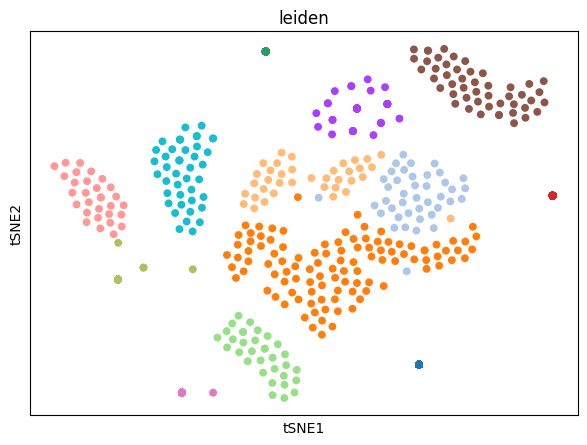

In [62]:
sc.pl.scatter(adata_A1_subset, basis="tsne", color="leiden")

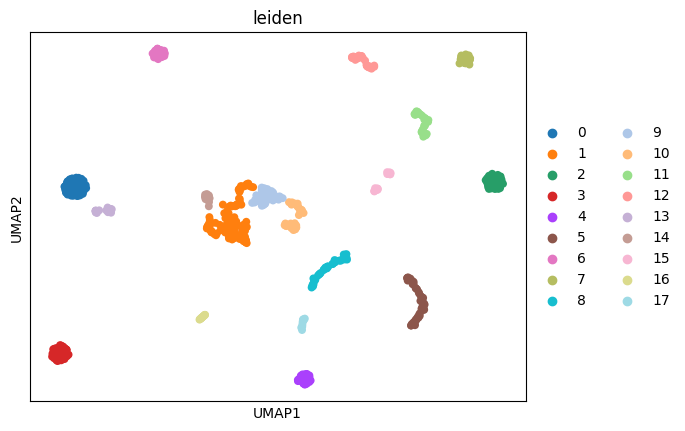

In [63]:
adata_A1_subset.obs["leiden"]
sc.pl.umap(adata_A1_subset, color="leiden")

In [64]:
adata_A1_subset.obs["cell_type"] = adata_A1.obs.loc[adata_A1_subset.obs_names, "cell_type"].values
cell_type_stats = (
    adata_A1_subset.obs
    .groupby(["leiden", "cell_type"])
    .size()
    .unstack(fill_value=0)
)

/var/folders/pm/_db3z8953vb1gtk99jkk_sb80000gn/T/ipykernel_6788/803772145.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["leiden", "cell_type"])


In [65]:
cell_type_stats

cell_type,cd4+tcells,cd8+tcells,cd19+cd20+b,cms1,cms2,cms3,gammadeltatcells,iga+plasma,igg+plasma,intermediate,...,pro-inflammatory,regulatorytcells,smoothmusclecells,spp1+,stalk-likeecs,stromal1,stromal3,thelper17cells,tip-likeecs,unknown
leiden,,,,,,,,,,,,,,,,,,,,,
0,3,0,18,2,119,0,0,1,0,0,...,1,0,0,0,2,1,0,0,1,0
1,0,0,1,0,31,0,0,0,0,0,...,0,0,0,0,3,58,0,0,0,4
2,0,1,3,0,18,0,0,0,0,0,...,2,1,0,0,3,15,0,0,0,2
3,0,0,20,0,59,2,0,2,0,0,...,3,1,0,0,4,0,1,0,0,0
4,0,0,4,1,28,2,0,0,0,0,...,9,0,0,0,1,3,0,0,0,0
5,0,1,2,0,18,0,0,0,0,0,...,7,0,1,0,2,6,0,2,1,0
6,0,0,1,0,41,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2
7,0,0,0,0,11,0,0,0,0,0,...,0,0,0,0,0,24,0,0,0,3
8,0,0,6,0,18,0,0,0,0,0,...,5,0,0,0,9,4,0,0,0,0


<Axes: xlabel='cell_type', ylabel='leiden'>

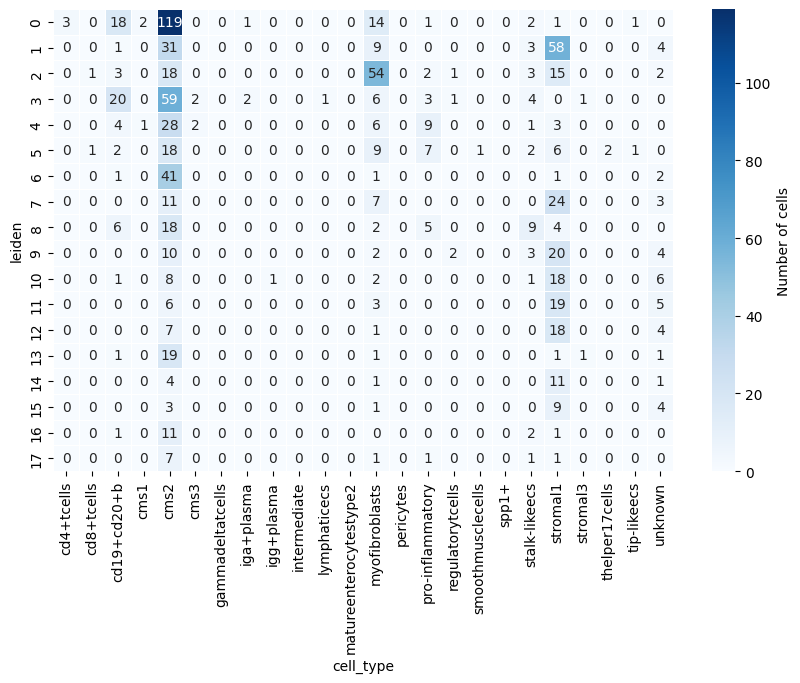

In [66]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    cell_type_stats,
    cmap="Blues",
    cbar_kws={"label": "Number of cells"},
    annot=True,
    fmt="d",
    linewidths=0.5,
)

/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:234: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))
/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/scipy/sparse/_index.py:210: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)


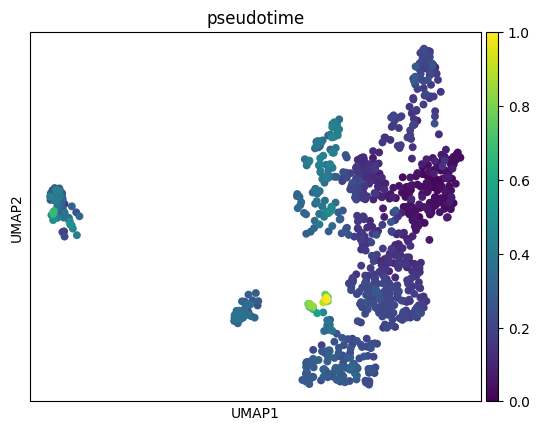

In [76]:
root_cell_type = "cms2"

root_cell = adata_A1_subset[adata_A1_subset.obs["cell_type"] == root_cell_type].obs_names[0]

adata_A1_subset.uns["iroot"] = adata_A1_subset.obs_names.get_loc(root_cell)

sc.pp.normalize_total(adata_A1_subset, target_sum=1e4)
sc.pp.log1p(adata_A1_subset)
sc.pp.pca(adata_A1_subset)
sc.pp.neighbors(adata_A1_subset, n_neighbors=10, n_pcs=40)

sc.tl.dpt(adata_A1_subset)

adata_A1_subset.obs["pseudotime"] = adata_A1_subset.obs["dpt_pseudotime"]

sc.pl.umap(adata_A1_subset, color=["pseudotime"])

In [ ]:
sorted_cells = adata_A1_subset.obs.sort_values("pseudotime").index.tolist()
ordered_df = adata_A1_subset.obs.loc[sorted_cells, ["cell_type", "pseudotime"]]
for cell, row in ordered_df.iterrows():
    print(f"{cell} ({row['cell_type']}, pseudotime={row['pseudotime']:.3f})")

ID_61849 (cms2, pseudotime=0.000)
ID_71486 (stromal1, pseudotime=0.010)
ID_68530 (cms2, pseudotime=0.016)
ID_72757 (stalk-likeecs, pseudotime=0.017)
ID_76477 (cms2, pseudotime=0.017)
ID_71158 (pro-inflammatory, pseudotime=0.019)
ID_75167 (pro-inflammatory, pseudotime=0.020)
ID_71991 (pro-inflammatory, pseudotime=0.020)
ID_70597 (cms2, pseudotime=0.020)
ID_74867 (stalk-likeecs, pseudotime=0.020)
ID_76251 (cms2, pseudotime=0.020)
ID_71516 (myofibroblasts, pseudotime=0.021)
ID_72579 (cms2, pseudotime=0.022)
ID_71867 (cms2, pseudotime=0.023)
ID_71862 (cms2, pseudotime=0.023)
ID_70665 (smoothmusclecells, pseudotime=0.023)
ID_71163 (pro-inflammatory, pseudotime=0.023)
ID_73058 (cms2, pseudotime=0.024)
ID_72004 (cms2, pseudotime=0.024)
ID_72425 (myofibroblasts, pseudotime=0.024)
ID_62805 (stromal1, pseudotime=0.024)
ID_72340 (cms2, pseudotime=0.024)
ID_71593 (cms2, pseudotime=0.024)
ID_80654 (stalk-likeecs, pseudotime=0.025)
ID_65730 (pro-inflammatory, pseudotime=0.025)
ID_78913 (cms2, pseudo

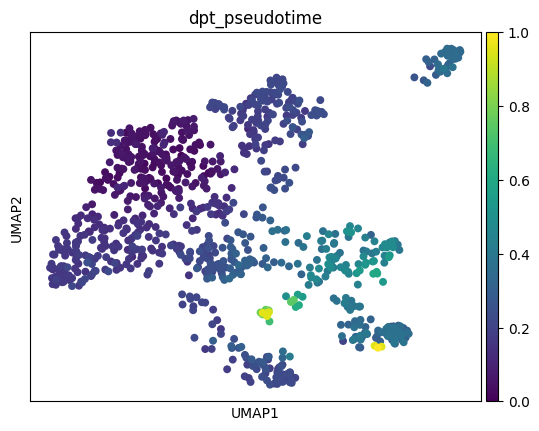

In [14]:
root_cell = np.flatnonzero(adata_A1_subset.obs["leiden"] == "0")[0]
adata_A1_subset.uns["iroot"] = root_cell
sc.tl.dpt(adata_A1_subset, n_dcs=10)
adata_A1_subset.obs["pseudotime"] = adata_A1_subset.obs["dpt_pseudotime"]
sc.pl.umap(adata_A1_subset, color="dpt_pseudotime")

In [ ]:
cluster_0 = adata_A1_subset.obs.query('leiden == "0"').copy()
cluster_0_sorted = cluster_0.sort_values(by="pseudotime")

cell_type_trend = cluster_0_sorted["cell_type"].reset_index(drop=True)
cell_type_transitions = cell_type_trend.loc[
    cell_type_trend.shift() != cell_type_trend
].reset_index(drop=True)

print(cell_type_transitions.tolist())

['stromal1', 'cd19+cd20+b', 'stalk-likeecs', 'cms2', 'stromal1', 'myofibroblasts', 'stromal1', 'cms2', 'stromal1', 'cd19+cd20+b', 'cms2', 'unknown', 'regulatorytcells', 'stromal1', 'cms2', 'stromal1', 'unknown', 'myofibroblasts', 'stromal1', 'cms2', 'stromal1', 'unknown', 'cms2', 'stromal1', 'regulatorytcells', 'stromal1', 'cms2', 'stromal1', 'cms2', 'stromal1', 'cms2', 'stromal1', 'myofibroblasts', 'stromal1', 'cms2', 'stromal1', 'cms2', 'stromal1', 'cms2', 'stromal1', 'cms2', 'stromal1', 'cms2', 'stromal1', 'cms2', 'stromal1', 'cms2', 'myofibroblasts', 'cms2', 'unknown', 'stromal1', 'cms2', 'stromal1', 'cms2', 'stromal1', 'unknown', 'stromal1', 'cms2', 'stromal1', 'unknown', 'stromal1', 'myofibroblasts', 'cms2', 'stromal1', 'cms2', 'stromal1', 'unknown', 'stromal1', 'cms2', 'stromal1', 'unknown', 'stromal1', 'myofibroblasts', 'cms2', 'stromal1', 'unknown', 'stromal1', 'cms2', 'stalk-likeecs', 'myofibroblasts', 'stromal1', 'cms2', 'cd19+cd20+b', 'stromal1', 'cms2', 'unknown', 'cms2', 

In [77]:
markers_m = get_DEG_multi(
    rdata=adata_A1_subset, adata=adata_A1_subset, group_key="cell_type", power=11
)
adata_A1_subset.uns["markers_m_DEAPLOG"] = markers_m

get the raw data frame...
struct the cell type sets for enrichment analysis...
Fisher_test_for_each_gene...


/Users/siyuanzhao/Documents/GitHub/BioVis2025/Python/DEAPLOG.py:206: RuntimeWarning: invalid value encountered in scalar divide
  score = ((((-np.log10(pv))*ra)*gene_mean)*100)/num_cell_set


merge differentially expressed genes...
Done!


In [78]:
markers_m

,cell_type,gene_name,ratio,p_value,q_value,score,mean_exValue
0,cd19+cd20+b,KRT7,1.000000,8.032508e-07,1.927802e-05,93.878132,8.933222
1,cms2,SLC12A2,1.000000,3.203334e-04,7.688001e-03,7.467998,8.933222
2,cms2,CD74,0.714286,9.549370e-10,2.291849e-08,12.985154,8.424491
3,myofibroblasts,BGN,1.000000,6.294112e-08,1.510587e-06,53.191369,8.863916
4,myofibroblasts,COL3A1,0.370370,1.199086e-09,2.877805e-08,23.899764,8.679961
5,stalk-likeecs,VWF,0.444444,1.118916e-04,2.685398e-03,47.483949,8.382272


In [79]:
adata_pseu_location_umap = get_genes_location_pseudotime(
    rdata=adata_A1_subset,
    adata=adata_A1_subset,
    group_key="cell_type",
    gene_matrix="markers_m_DEAPLOG",
    obsm="X_umap",
    power=11,
)

Running time : 0:00:00.297164 Seconds
Done!


In [80]:
adata_pseu_location_umap

,gene_name,x_location,y_location,dpt_pseudotime,cell_type,ratio,q_value,mean_exValue
0,PDPN,-10.105306,15.900949,0.313118,NS,0.000000,1.000000e+00,0.000000
1,CD52,14.498721,17.544506,0.044605,NS,0.000000,1.000000e+00,0.000000
2,VCAM1,11.946737,14.065113,0.138769,NS,0.000000,1.000000e+00,0.000000
3,CD2,14.353955,22.387913,0.176295,NS,0.000000,1.000000e+00,0.000000
4,S100A4,8.928647,7.214143,0.321915,NS,0.000000,1.000000e+00,0.000000
5,ELF3,5.439800,15.942137,0.325470,NS,0.000000,1.000000e+00,0.000000
6,CD55,-10.248995,14.964337,0.306856,NS,0.000000,1.000000e+00,0.000000
7,CD34,-9.969193,15.579784,0.176909,NS,0.000000,1.000000e+00,0.000000
8,EPCAM,6.091060,17.823435,0.418001,NS,0.000000,1.000000e+00,0.000000
9,IGKC,6.123747,10.400434,0.833290,NS,0.000000,1.000000e+00,0.000000


In [81]:
q_value = list(-np.log10(adata_pseu_location_umap["q_value"]))
for i in range(len(q_value)):
    if q_value[i] == np.inf:
        q_value[i] = 500

Text(0.5, 1.0, 'adata_genes_based_UMAP')

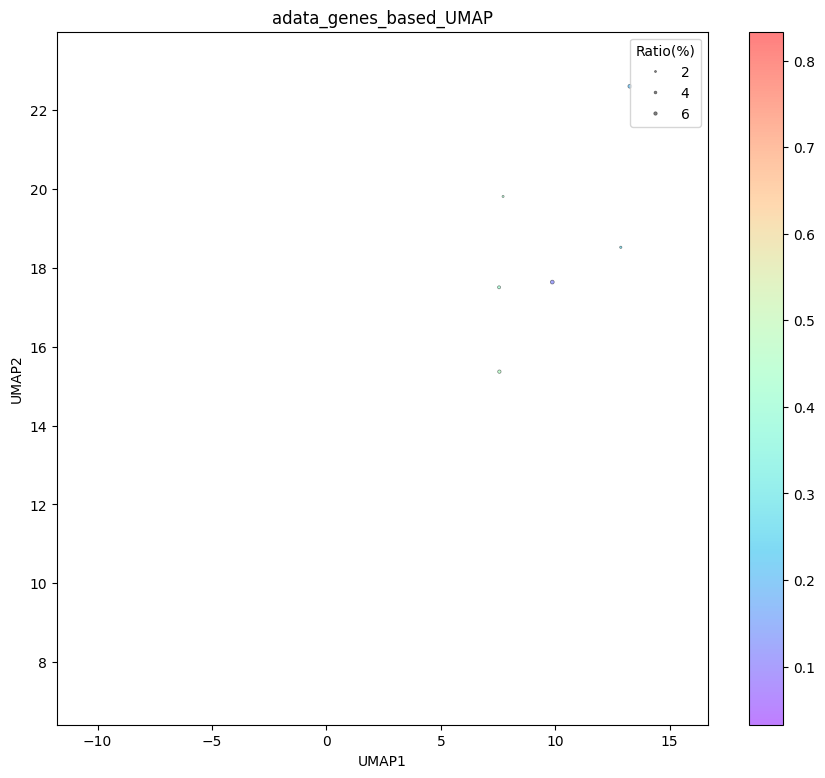

In [82]:
plt.figure(figsize=(10.5, 9))
gene_map = plt.scatter(
    x=adata_pseu_location_umap["x_location"],
    y=adata_pseu_location_umap["y_location"],
    marker="o",
    s=q_value,
    linewidths=0.5,
    alpha=0.5,
    edgecolors="black",
    cmap="rainbow",
    c=adata_pseu_location_umap["dpt_pseudotime"],
)
"""
#for gene in ['MYOD1']:
for gene in adata_skm_pseu_location_draw_graph_tf_R50['gene_name']:
    df_gene = adata_skm_pseu_location_draw_graph_tf_R50.loc[adata_skm_pseu_location_draw_graph_tf_R50['gene_name']==gene,]
    if df_gene.shape[0]>1:
        for i in range(df_gene.shape[0]):
            plt.annotate(gene,xy=(df_gene.iloc[i,1],df_gene.iloc[i,2]),fontsize=4)
    else:
        plt.annotate(gene,xy=(df_gene.iloc[0,1],df_gene.iloc[0,2]),fontsize=4)
"""

plt.colorbar()
handles, labels = gene_map.legend_elements(prop="sizes", alpha=0.5, num=5)
plt.legend(handles, labels, loc="upper right", title="Ratio(%)")
plt.grid(False)
plt.xlabel(xlabel="UMAP1")
plt.ylabel(ylabel="UMAP2")
plt.title(label="adata_genes_based_UMAP")